# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

transcript         full_name
ali      \n \nLadies and gentlemen, please welcome to t...          Ali Wong
anthony  \n \nThank you. Thank you. Thank you, San Fran...  Anthony Jeselnik
bill     \n \n[cheers and applause] All right, thank yo...         Bill Burr
dave     \n \nThis is Dave. He tells dirty jokes for a ...    Dave Chappelle
jim      \n \n[Car horn honks] [Audience cheering] [Ann...     Jim Jefferies
joe      \n \n[rock music playing]\n[audience cheering]...         Joe Rogan
john     \n \nArmed with boyish charm and a sharp wit, ...      John Mulaney
louis    \n \nIntro\nFade the music out. Let’s roll. Ho...        Louis C.K.
mike     \n \nWow. Hey, thank you. Thanks. Thank you, g...    Mike Birbiglia
ricky    \n \nHello. Hello! How you doing? Great. Thank...     Ricky Gervais

In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

transcript         full_name  \
ali      \n \nLadies and gentlemen, please welcome to t...          Ali Wong   
anthony  \n \nThank you. Thank you. Thank you, San Fran...  Anthony Jeselnik   
bill     \n \n[cheers and applause] All right, thank yo...         Bill Burr   
dave     \n \nThis is Dave. He tells dirty jokes for a ...    Dave Chappelle   
jim      \n \n[Car horn honks] [Audience cheering] [Ann...     Jim Jefferies   
joe      \n \n[rock music playing]\n[audience cheering]...         Joe Rogan   
john     \n \nArmed with boyish charm and a sharp wit, ...      John Mulaney   
louis    \n \nIntro\nFade the music out. Let’s roll. Ho...        Louis C.K.   
mike     \n \nWow. Hey, thank you. Thanks. Thank you, g...    Mike Birbiglia   
ricky    \n \nHello. Hello! How you doing? Great. Thank...     Ricky Gervais   

         polarity  subjectivity  
ali      0.069359      0.482403  
anthony  0.054285      0.559732  
bill     0.016479      0.537016  
dave    -0.004069      0.513958  
jim      0.044224      0.523382  
joe      0.039378      0.547370  
john     0.081962      0.483122  
louis    0.056665      0.515796  
mike     0.092927      0.518476  
ricky    0.066489      0.497313

In [3]:
data['polarity']

ali        0.069359
anthony    0.054285
bill       0.016479
dave      -0.004069
jim        0.044224
joe        0.039378
john       0.081962
louis      0.056665
mike       0.092927
ricky      0.066489
Name: polarity, dtype: float64

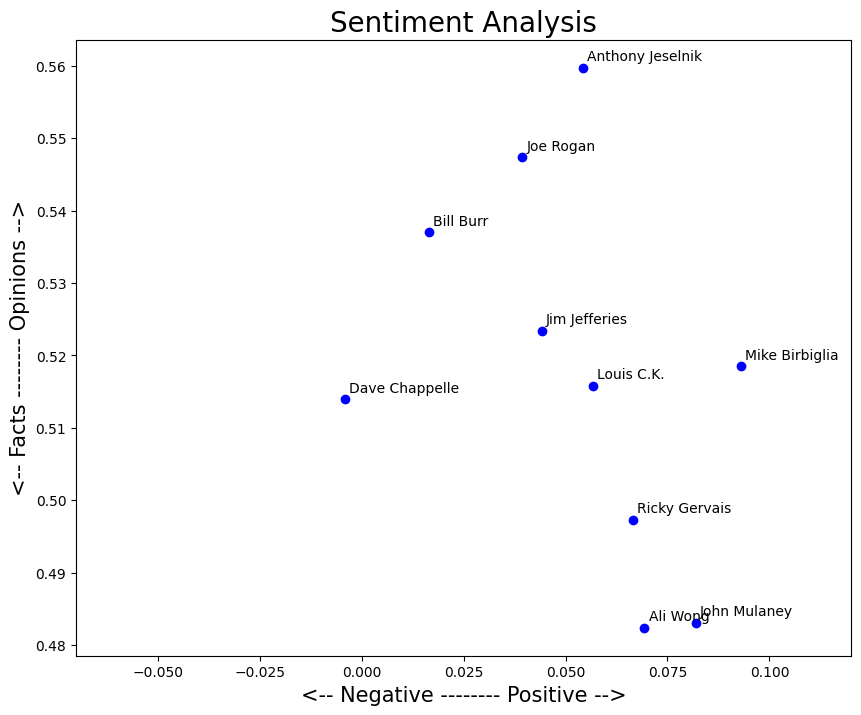

In [4]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.07, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [5]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
# Let's take a look at our data again
data

transcript         full_name  \
ali      \n \nLadies and gentlemen, please welcome to t...          Ali Wong   
anthony  \n \nThank you. Thank you. Thank you, San Fran...  Anthony Jeselnik   
bill     \n \n[cheers and applause] All right, thank yo...         Bill Burr   
dave     \n \nThis is Dave. He tells dirty jokes for a ...    Dave Chappelle   
jim      \n \n[Car horn honks] [Audience cheering] [Ann...     Jim Jefferies   
joe      \n \n[rock music playing]\n[audience cheering]...         Joe Rogan   
john     \n \nArmed with boyish charm and a sharp wit, ...      John Mulaney   
louis    \n \nIntro\nFade the music out. Let’s roll. Ho...        Louis C.K.   
mike     \n \nWow. Hey, thank you. Thanks. Thank you, g...    Mike Birbiglia   
ricky    \n \nHello. Hello! How you doing? Great. Thank...     Ricky Gervais   

         polarity  subjectivity  
ali      0.069359      0.482403  
anthony  0.054285      0.559732  
bill     0.016479      0.537016  
dave    -0.004069      0.513958  
jim      0.044224      0.523382  
joe      0.039378      0.547370  
john     0.081962      0.483122  
louis    0.056665      0.515796  
mike     0.092927      0.518476  
ricky    0.066489      0.497313

In [7]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['\n \nLadies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming.\nUm… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they jus

In [8]:
# The list has 10 elements, one for each transcript
len(list_pieces)

10

In [9]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [10]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09236886724386723,
  -0.014671592775041055,
  0.09538361348808912,
  0.062267541486291496,
  0.08577200577200576,
  0.030089690638160044,
  0.07351994851994852],
 [0.13477350357097198,
  -0.06333451704545455,
  -0.056153799903799935,
  0.014602659245516405,
  0.16377334420812684,
  0.09091338259441709,
  0.09420031055900621,
  0.11566683919944787,
  -0.03551490672026391,
  0.06747835497835497],
 [-0.0326152022580594,
  0.006825656825656827,
  0.023452001215159095,
  0.01934081890331888,
  -0.026312183887941466,
  0.06207506613756614,
  0.030250682288725742,
  -0.020351594027441484,
  -0.01150485008818343,
  0.10757491470108295],
 [-0.05093449586407334,
  -0.07101471980837788,
  0.035829891691960644,
  0.08313791054959534,
  -0.026718682968682954,
  0.09782737058599124,
  -0.12616778733098175,
  -0.0858667847304211,
  -0.06019759281122916,
  0.1535641186299081],
 [0.09480343501984131,
  0.10371625923096511,
  0.11

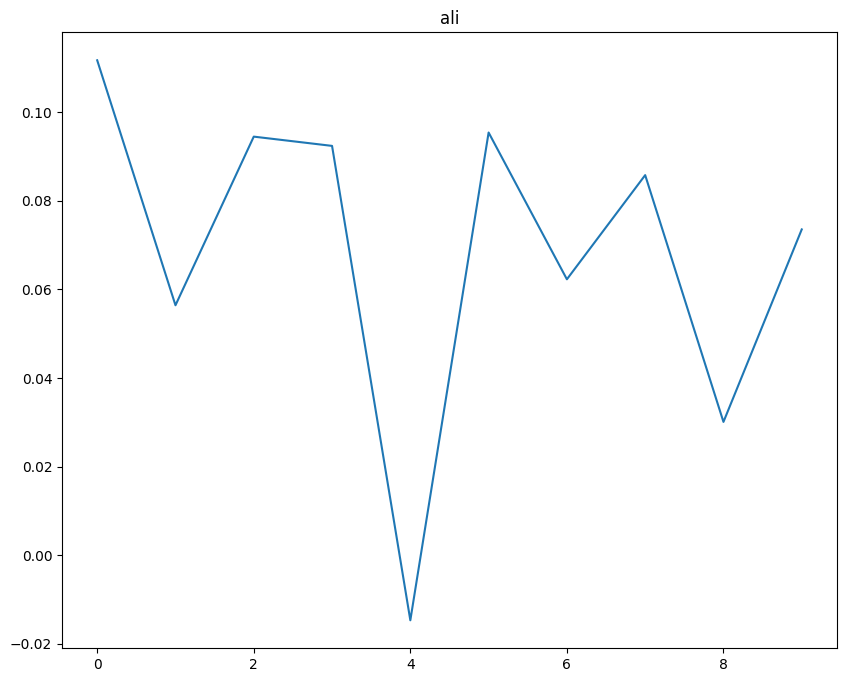

In [11]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

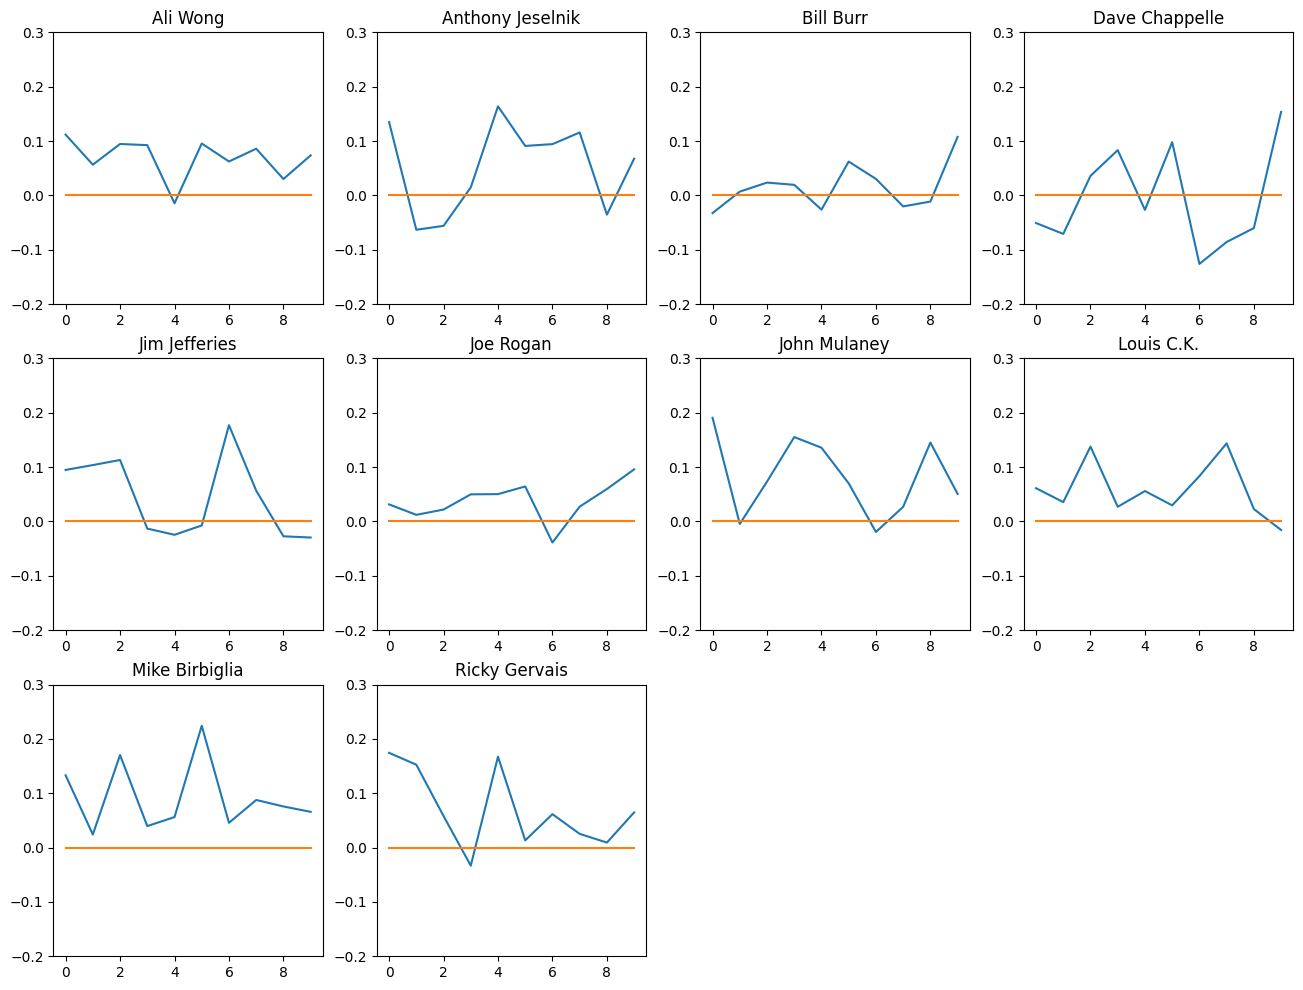

In [12]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


question 1:

In [13]:
def getAnalysis(score):
    if score < 0:
     return "Negative"
    elif score == 0:
     return "Neutral"
    else:
     return "Positive"

In [14]:
data['classify'] = data['polarity'].apply(getAnalysis)

In [15]:
data['classify']

ali        Positive
anthony    Positive
bill       Positive
dave       Negative
jim        Positive
joe        Positive
john       Positive
louis      Positive
mike       Positive
ricky      Positive
Name: classify, dtype: object

In [16]:
data

transcript         full_name  \
ali      \n \nLadies and gentlemen, please welcome to t...          Ali Wong   
anthony  \n \nThank you. Thank you. Thank you, San Fran...  Anthony Jeselnik   
bill     \n \n[cheers and applause] All right, thank yo...         Bill Burr   
dave     \n \nThis is Dave. He tells dirty jokes for a ...    Dave Chappelle   
jim      \n \n[Car horn honks] [Audience cheering] [Ann...     Jim Jefferies   
joe      \n \n[rock music playing]\n[audience cheering]...         Joe Rogan   
john     \n \nArmed with boyish charm and a sharp wit, ...      John Mulaney   
louis    \n \nIntro\nFade the music out. Let’s roll. Ho...        Louis C.K.   
mike     \n \nWow. Hey, thank you. Thanks. Thank you, g...    Mike Birbiglia   
ricky    \n \nHello. Hello! How you doing? Great. Thank...     Ricky Gervais   

         polarity  subjectivity  classify  
ali      0.069359      0.482403  Positive  
anthony  0.054285      0.559732  Positive  
bill     0.016479      0.537016  Positive  
dave    -0.004069      0.513958  Negative  
jim      0.044224      0.523382  Positive  
joe      0.039378      0.547370  Positive  
john     0.081962      0.483122  Positive  
louis    0.056665      0.515796  Positive  
mike     0.092927      0.518476  Positive  
ricky    0.066489      0.497313  Positive

In [17]:
def sgetAnalysis(score):
    if score < 0.5:
     return "factual content"
    elif score == 0.5:
     return "Neutral"
    else:
     return "opinionated"

In [18]:
data['classify_acc_to_subjectivity'] = data['subjectivity'].apply(sgetAnalysis)

In [19]:
data['classify_acc_to_subjectivity']

ali        factual content
anthony        opinionated
bill           opinionated
dave           opinionated
jim            opinionated
joe            opinionated
john       factual content
louis          opinionated
mike           opinionated
ricky      factual content
Name: classify_acc_to_subjectivity, dtype: object

In [20]:
data

transcript         full_name  \
ali      \n \nLadies and gentlemen, please welcome to t...          Ali Wong   
anthony  \n \nThank you. Thank you. Thank you, San Fran...  Anthony Jeselnik   
bill     \n \n[cheers and applause] All right, thank yo...         Bill Burr   
dave     \n \nThis is Dave. He tells dirty jokes for a ...    Dave Chappelle   
jim      \n \n[Car horn honks] [Audience cheering] [Ann...     Jim Jefferies   
joe      \n \n[rock music playing]\n[audience cheering]...         Joe Rogan   
john     \n \nArmed with boyish charm and a sharp wit, ...      John Mulaney   
louis    \n \nIntro\nFade the music out. Let’s roll. Ho...        Louis C.K.   
mike     \n \nWow. Hey, thank you. Thanks. Thank you, g...    Mike Birbiglia   
ricky    \n \nHello. Hello! How you doing? Great. Thank...     Ricky Gervais   

         polarity  subjectivity  classify classify_acc_to_subjectivity  
ali      0.069359      0.482403  Positive              factual content  
anthony  0.054285      0.559732  Positive                  opinionated  
bill     0.016479      0.537016  Positive                  opinionated  
dave    -0.004069      0.513958  Negative                  opinionated  
jim      0.044224      0.523382  Positive                  opinionated  
joe      0.039378      0.547370  Positive                  opinionated  
john     0.081962      0.483122  Positive              factual content  
louis    0.056665      0.515796  Positive                  opinionated  
mike     0.092927      0.518476  Positive                  opinionated  
ricky    0.066489      0.497313  Positive              factual content

In [21]:
import numpy as np
import math

def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [22]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['\n \nLadies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming.\nUm… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they jus

In [23]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.18230030721966203,
  0.0335034013605442,
  0.09856398809523811,
  0.02090643274853801,
  0.11037581699346405,
  0.07853800611153554,
  0.039282694962042786,
  0.13052455357142856,
  0.018840579710144918,
  -0.03669387755102041,
  0.03333474251443002,
  0.1858715503246753,
  0.08565315315315315,
  0.03754560915275201,
  0.08120839733742959,
  0.09166666666666667,
  0.04222810111699003,
  -0.007893518518518503,
  0.024843358395989994,
  0.13275510204081634],
 [0.2678294552669553,
  -0.0016941391941391866,
  -0.033207792207792214,
  -0.08264652014652014,
  -0.1334353741496599,
  0.031099590373783917,
  0.13125000000000003,
  -0.05312805474095798,
  0.11977124183006535,
  0.2065182436611008,
  0.008928571428571414,
  0.17289819376026275,
  0.18154761904761904,
  0.020828571428571422,
  0.08748677248677247,
  0.15242272347535502,
  -0.18046461640211645,
  0.07319737554112557,
  -0.00950243172465395,
  0.1331741326306544],
 [0.01614895152129194,
  -0.0847041847041847,
  -0.00989102108505

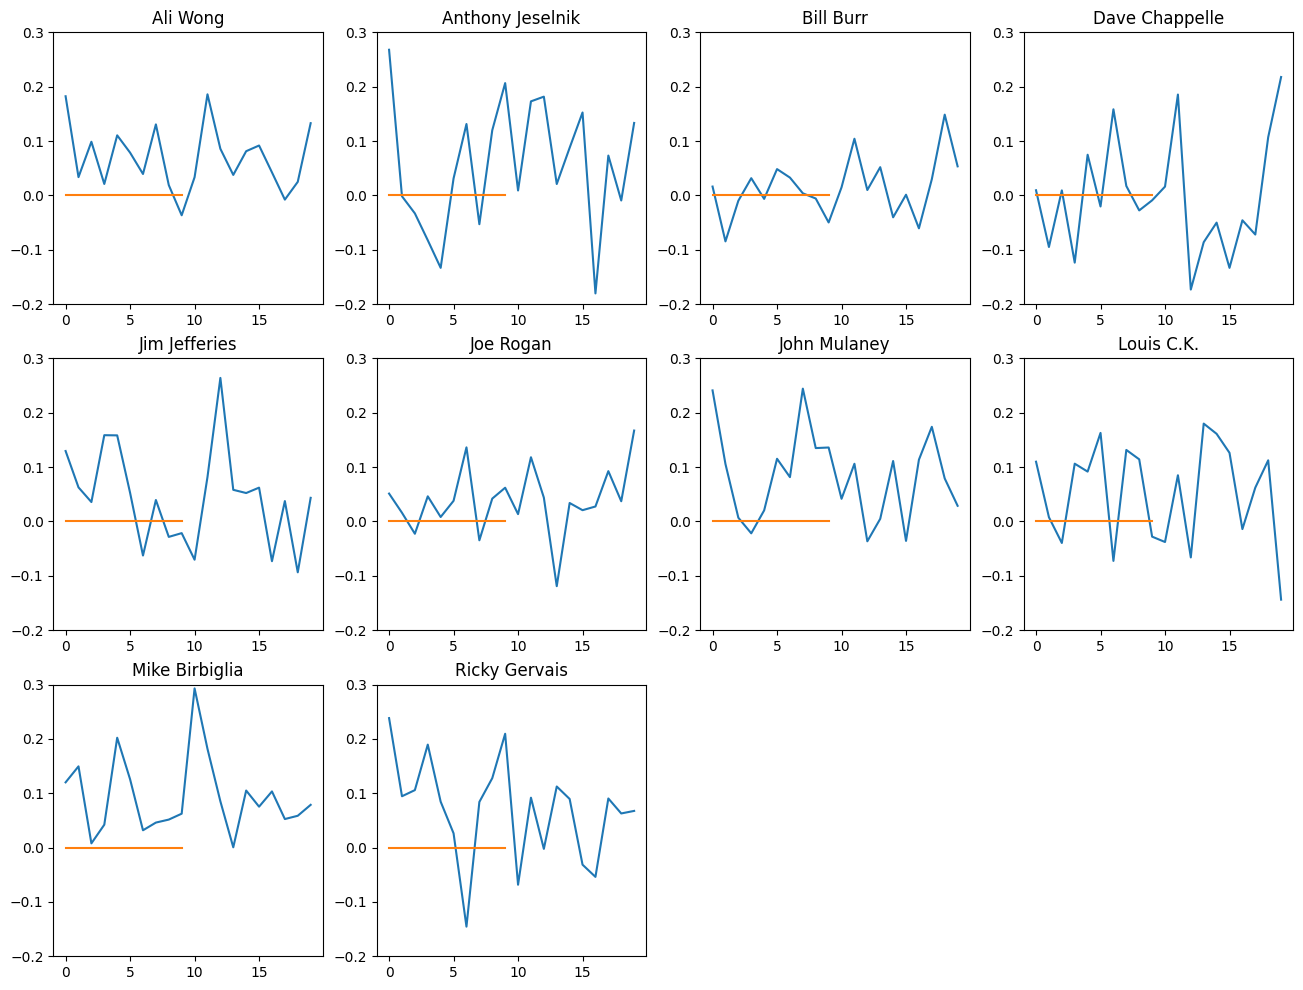

In [24]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [25]:
# Calculate the subjectivity for each piece of text

subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    
subjectivity_transcript

[[0.6480798771121351,
  0.4924319727891157,
  0.42598586309523817,
  0.43875835421888054,
  0.339624183006536,
  0.41167080468551054,
  0.43813319530710837,
  0.5294642857142858,
  0.4462560386473431,
  0.4451632653061224,
  0.5311219336219336,
  0.49169973544973544,
  0.555855855855856,
  0.4312585034013606,
  0.4265809011776754,
  0.6690972222222223,
  0.5134626690182246,
  0.5013756613756615,
  0.5189223057644109,
  0.4477551020408163],
 [0.5502579365079365,
  0.5854497354497356,
  0.6661659451659452,
  0.5577991452991452,
  0.7138095238095238,
  0.5140040962621607,
  0.673148148148148,
  0.6159172368849787,
  0.4513071895424837,
  0.4609013605442178,
  0.5809113300492613,
  0.5541050903119868,
  0.35317460317460314,
  0.5471619047619048,
  0.6595950345950347,
  0.6473057644110276,
  0.5699239417989419,
  0.5253156565656565,
  0.5392442947998505,
  0.4696585419411506],
 [0.6868177980412022,
  0.6179022366522366,
  0.40408078654347307,
  0.4570238095238095,
  0.6096672897809262,
  0.

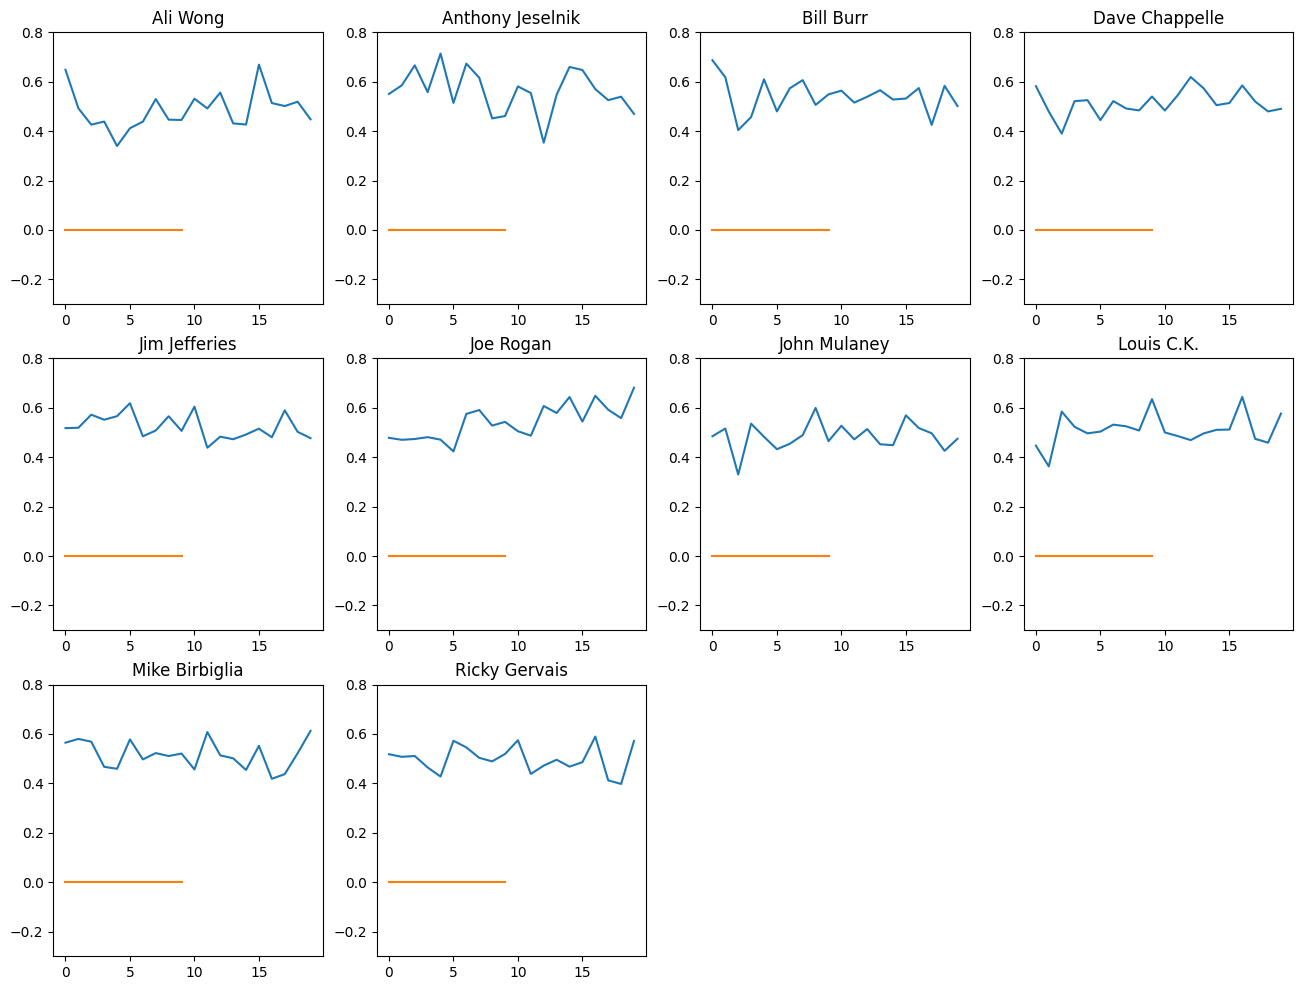

In [26]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-0.3, ymax=0.8)
    
plt.show()